## seaborn library
- Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
- 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계

- sns.lineplot(): 시간 변화에 따른 값의 변화 및 흐름을 시각화
    - sns.lineplot(x,y,data)
        - x: 사용할 x축 데이터
        - y: 사용할 y축 데이터
        - data: 사용할 전체 데이터(data 인자값 전달 시 x,y 인자값으로는 키워드 문자열 전달)
- sns.distplot(): 히스토그램 및 커널밀도추정치(확률밀도함수의 일종)를 한 번에 시각화
    - sns.distplot(x,hist,kde)
        - x: 사용할 데이터
        - hist: 히스토그램 설정 여부, 기본값 = True
        - kde: 확률밀도함수 설정 여부, 기본값 = True
    - sns.boxplot(): 각 속성 별로  boxplot 시각화
        - sns.boxplot(x,y,data,by)
            - x: 사용할 x축 데이터
            - y: 사용할 y축 데이터
            - data: 사용할 전체 데이터(data 인자값 전달 시 x,y 인자값으로는 키워드 문자열 전달)
            - by: gruop_by 기준
     - sns.countplot(): 각 카테고리별로 데이터 개수를 시각화
         - sns.countplot(x,data)
     - sns.barplot(): 카테고리별 수치를 시각화,값에 대한 비교 용이
         - sns.barplot(x,y,data)
     - sns.pairplot(): 데이터프레임을 인수로 받아 열의 조합에 대해 스케터 플롯을 그리고 대각선 영역에는 해당 데이터의 히스토그램 시각화
     - sns.heatmap(): 카테고리 값으로 상관계수

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 처리 관련 pandas function
- Series.map(func): Seires 객체에 대해 사용자정의함수 적용
- Series/DataFrame.apply(func): series/dataframe 객체에 대해 사용자정의함수 적용

In [2]:
# 5행 짜리, 과일 이름으로 이루어진 series
s1=pd.Series(['banana','apple','apple','kiwi','orange'])
s1

0    banana
1     apple
2     apple
3      kiwi
4    orange
dtype: object

In [3]:
# mapping 정보를 담고 있는 딕셔너리 생성
# 고유값 찾기
s1.unique()


array(['banana', 'apple', 'kiwi', 'orange'], dtype=object)

In [4]:
# 딕셔너리 생성
map1={'apple':0,'banana':1,  'kiwi':2, 'orange':3}

In [5]:
map2=dict(zip(s1.unique(),range(4)))
map2

{'banana': 0, 'apple': 1, 'kiwi': 2, 'orange': 3}

In [6]:
# map() with dict
# for 반복문을 사용하지 않고 맵핑 실행
s1.map(map2)

0    0
1    1
2    1
3    2
4    3
dtype: int64

In [7]:
# map with function
s2=pd.Series([1,2,3,4,5])
s2

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [8]:
s2.map(np.sqrt)

0    1.000000
1    1.414214
2    1.732051
3    2.000000
4    2.236068
dtype: float64

In [9]:
# map() with lambda function 
# s2 모든 값에 2배 한 담에 3더하기
def my_math(x):
    return(x*2)+3

In [10]:
s2.map(my_math)

0     5
1     7
2     9
3    11
4    13
dtype: int64

In [11]:
# 사용자 정의 함수 def 쓰질 않는 것이 일반적
s2.map(lambda x: (x*2)+3)

0     5
1     7
2     9
3    11
4    13
dtype: int64

In [12]:
# apply : sereis,dataframe 둘다 가능
s2.apply(np.sqrt)

0    1.000000
1    1.414214
2    1.732051
3    2.000000
4    2.236068
dtype: float64

In [13]:
# 4*2 구조에서 모든 값이 1인 데이터프레임 생성
df1=pd.DataFrame(np.ones((4,2)))
df1

,0,1
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0


In [14]:
# apply 기본 동작: 컬럼 기준
# 모든 컬럼에 동일한 연산/ 작업을 수행할 때 사용할 수 있다.
# lambda 함수 적용
# (x*2)+3
df1.apply(lambda x: (x*2)+3)

,0,1
0,5.0,5.0
1,5.0,5.0
2,5.0,5.0
3,5.0,5.0


In [15]:
# 내장함수 적용
# df.function VS df.apply(function)
# sum()
df1.sum()

0    4.0
1    4.0
dtype: float64

In [16]:
df1.apply(sum)

0    4.0
1    4.0
dtype: float64

In [17]:
# axis=0 이 기본
df1.apply(sum,axis=1)

0    2.0
1    2.0
2    2.0
3    2.0
dtype: float64

In [18]:
# 사각형의 가로,세로 길이를 저장하고 있는 데이터프레임 생성
# 3*3
# 컬럼: 가로,세로 
# 로우: 값
df2=pd.DataFrame({'width':[10,15,7],'height':[5,8,13]})

In [19]:
df2

,width,height
0,10,5
1,15,8
2,7,13


In [20]:
def area(x):
    # x : series / label=['width',height]
    return x['width']*x['height']

In [21]:
# apply 적용
df2['area1']=df2.apply(area,axis=1)
df2

,width,height,area1
0,10,5,50
1,15,8,120
2,7,13,91


In [22]:
# lambda로 정의
df2.apply(lambda x: x[0]*x[1],axis=1)

0     50
1    120
2     91
dtype: int64

#### 데이터 변환하기
- 배열 타입의 데이터를 데이터프레임으로 변환하여 최종데이터로 생성하기
1. 데이터 불러오기
2. data,target 값을 분리해서 변수로 할당하되 target은 2차원 데이터로 생성(150행1열)
3. numpy 함수를 이용하여 data,target을 열 방향으로 합치기
4. 3번 데이터를 이용하여 dataframe 생성, 컬럼이름도 동시에 생성
5. 품종은 문자타입으로 최종변환(0=setosa, 1= versicolor, 2=virginica) 5번에서 map,apply 함수 사용
6. 컬럼명 변경: (cm)제거, 공백 제거

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
iris



{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [24]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
target=iris['target'].reshape(-1,1)
target.shape

(150, 1)

In [26]:
data=iris['data']

In [27]:
df_data=np.append(data,target,axis=1)

In [28]:
df=pd.DataFrame(df_data,columns=iris['feature_names']+['species'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [29]:
dict_map=dict(zip(range(3),iris['target_names']))
df['species']=[dict_map[i] for i in iris['target']]

In [30]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [31]:
# 컬럼명 변경
# df.rename({old:new},axis=1,inplace=True)
for col in df.columns[:-1]:
    new_col=col.replace(' (cm)','')
    new_col=new_col.replace(' ','_')
#    print(col)
#    print(new_col)
    df.rename({col:new_col},axis=1,inplace=True)

In [32]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 데이터 탐색하기


In [33]:
# 수치형 변수의 기술통계값 확인
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
# 범주형 변수까지 포함
# include='all'
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


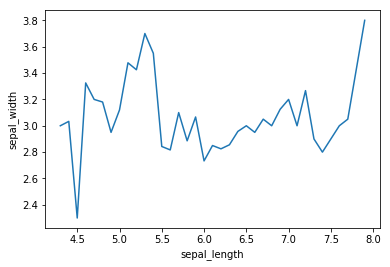

In [35]:
# line plot
# df.plot(kind='..',x=col,y=col)
# sns.lineplot(x=col,y=col,data)
# x축: sepal_length
# y축: sepal_width
# ci: 같은 x의 값에 있는 y 값들의 표준편차
sns.lineplot(x='sepal_length',y='sepal_width',data=df,ci=None)
plt.show()

C:\Users\winst\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


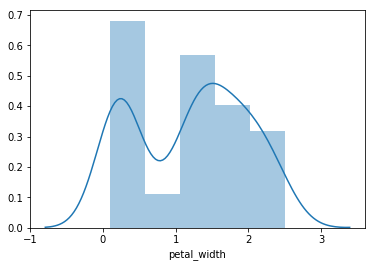

In [36]:
# distplot
# 히스토그램 & 확률밀도함수(라인)를 한번에 그릴수 있다
# 기준값: petal_width
sns.distplot(df['petal_width'])

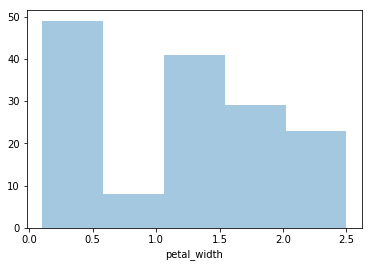

In [37]:
# 히스토그램만 시각화
# kde=False
# 확률밀도함수만 시각화
# hist=False
sns.distplot(df['petal_width'],kde=False)

## subplots in Seaborn
- sns.distplot(..., ax=axes[m,n])
    - plt.subplots(r,c)
    - axes 객체생성해서 subplot 사용하는 방식
- plt.subplot(r,c,i)
    - subplot 단독 생성해서 사용하는 방식

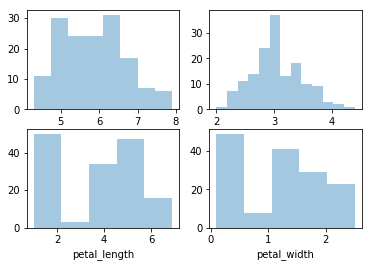

In [38]:
# subplot 단독으로 생성해서 각 속성별 distplot 그리기
# 레이아웃 2*2
# 위치 좌상(sepal_length) 우상(sepal_width), 좌하(petal_length),우하(petal_width)
plt.subplot(2,2,1)
sns.distplot(df['sepal_length'],kde=False)
plt.subplot(2,2,2)
sns.distplot(df['sepal_width'],kde=False)
plt.subplot(2,2,3)
sns.distplot(df['petal_length'],kde=False)
plt.subplot(2,2,4)
sns.distplot(df['petal_width'],kde=False)
plt.show()

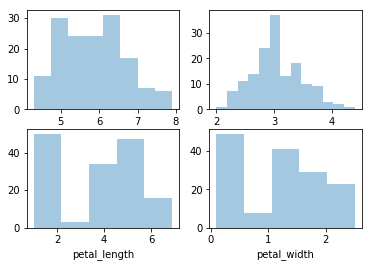

In [56]:
# 각각의 axes에 대해 서로 다른 값으로 dist plot 그리기
# sns. ~~plot(ax=axes[0,0])
fig,axes=plt.subplots(2,2)

sns.distplot(df['sepal_length'],ax=axes[0,0],kde=False)

sns.distplot(df['sepal_width'],ax=axes[0,1],kde=False)

sns.distplot(df['petal_length'],ax=axes[1,0],kde=False)

sns.distplot(df['petal_width'],ax=axes[1,1],kde=False)

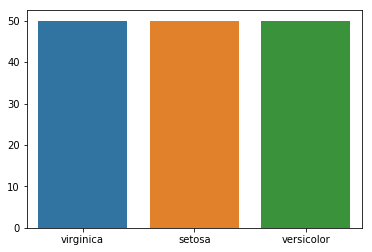

In [40]:
# count plot
# 범주형 데이터에 사용 
# 첫번째 방법
tmp=df['species'].value_counts()
sns.barplot(x=tmp.index,y=tmp.values)

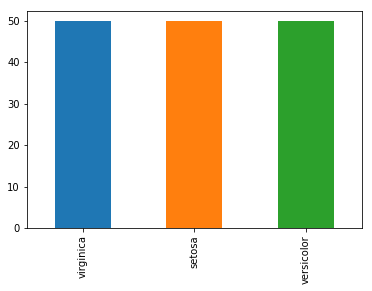

In [41]:
tmp=df['species'].value_counts().plot(kind='bar')

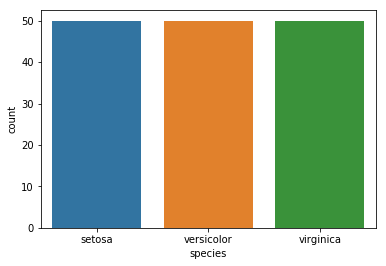

In [42]:
# 두번째
sns.countplot(x='species',data=df)

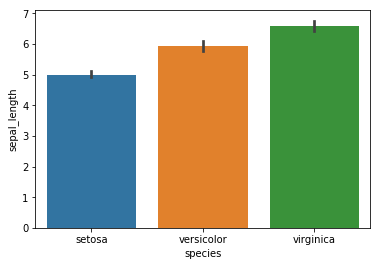

In [43]:
# bar plot
sns.barplot(x='species',y='sepal_length',data=df)

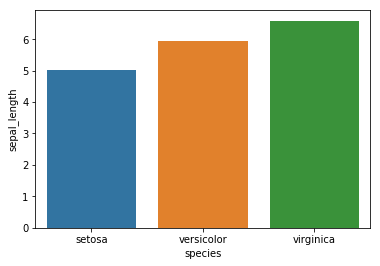

In [44]:
# 에러바 없애기
sns.barplot(x='species',y='sepal_length',data=df,ci=None)

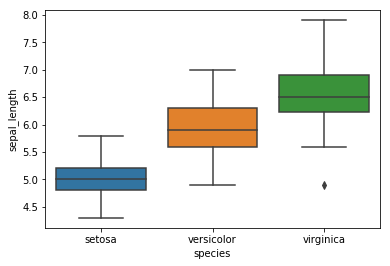

In [45]:
# boxplot
# sepal_length 속성에 대한 종별 boxplot
sns.boxplot(x='species',y='sepal_length',data=df)

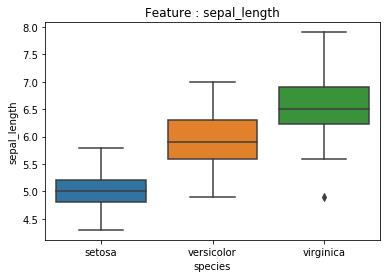

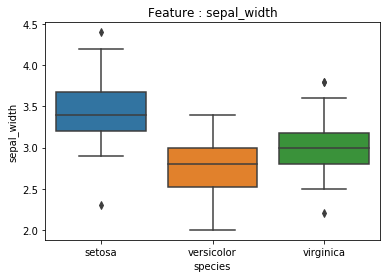

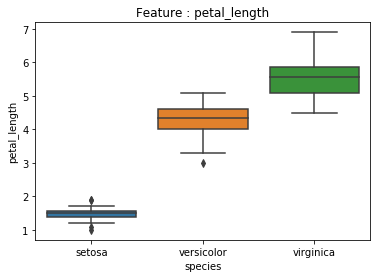

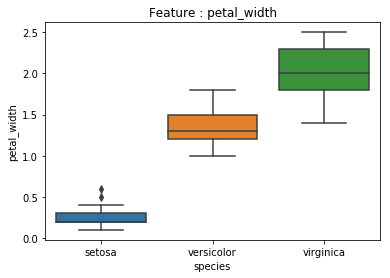

In [46]:
# 속성마다 종별 boxplot
for col in df.columns[:-1]:
    sns.boxplot(x='species',y=col,data=df)
    plt.title('Feature : {}'.format(col))
    plt.show()

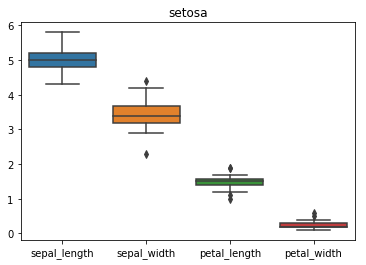

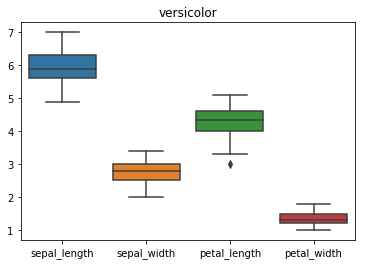

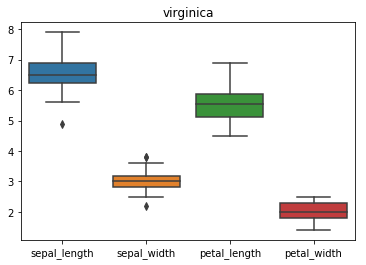

In [47]:
# 종마다 속성별
for s in df['species'].unique():
    sns.boxplot(data=df[df['species']==s])
    plt.title(s)
    plt.show()

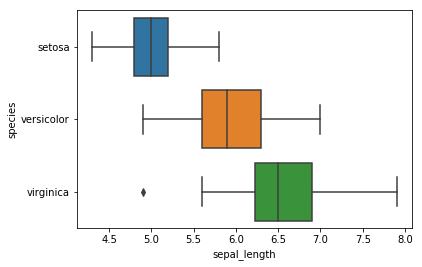

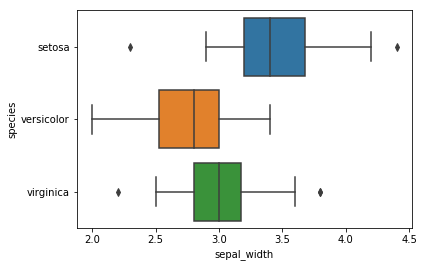

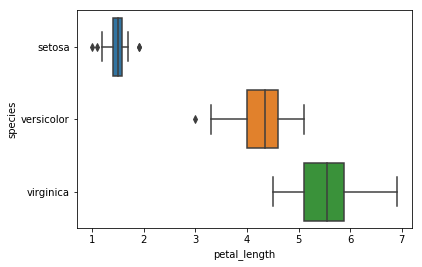

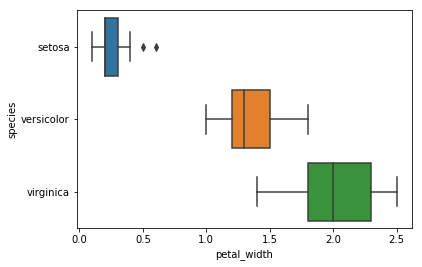

In [48]:
# 수치형 데이터에 대한 boxplot
for col in df.select_dtypes(include='float'):
    sns.boxplot(x=col,y='species',data=df)
    plt.show()

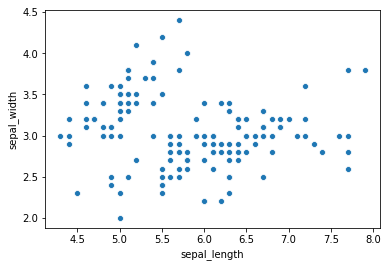

In [49]:
# scatter plot
# 관계를 보려는 속성: sepal_length,sepal_width 분포
sns.scatterplot(data=df,x='sepal_length',y='sepal_width')

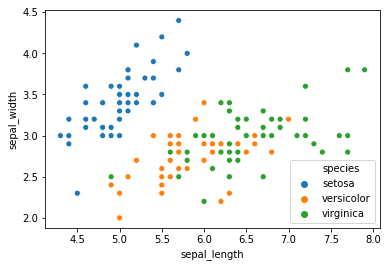

In [50]:
# 종별로 색상 구분 hue='species'
sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='species')

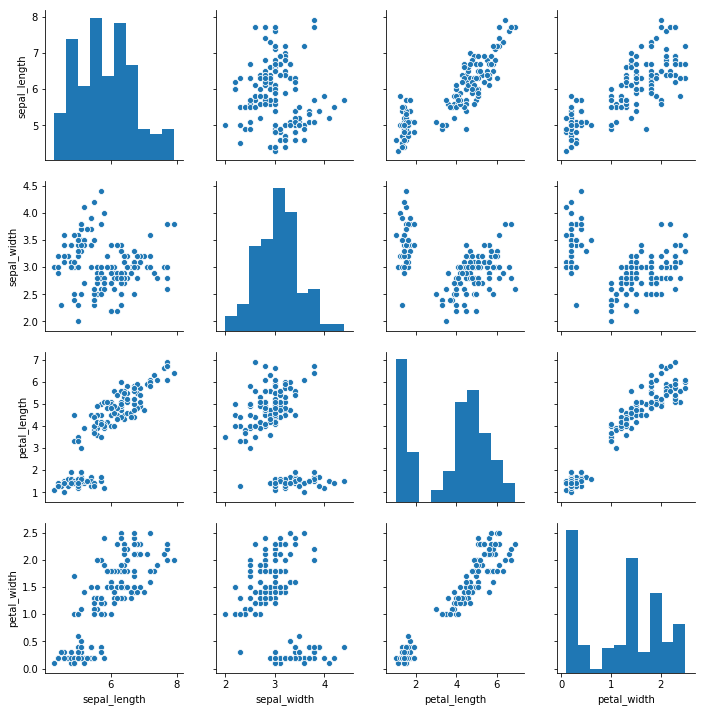

In [51]:
# pairplot: pandas.plotting>scatter_matrix
sns.pairplot(df)


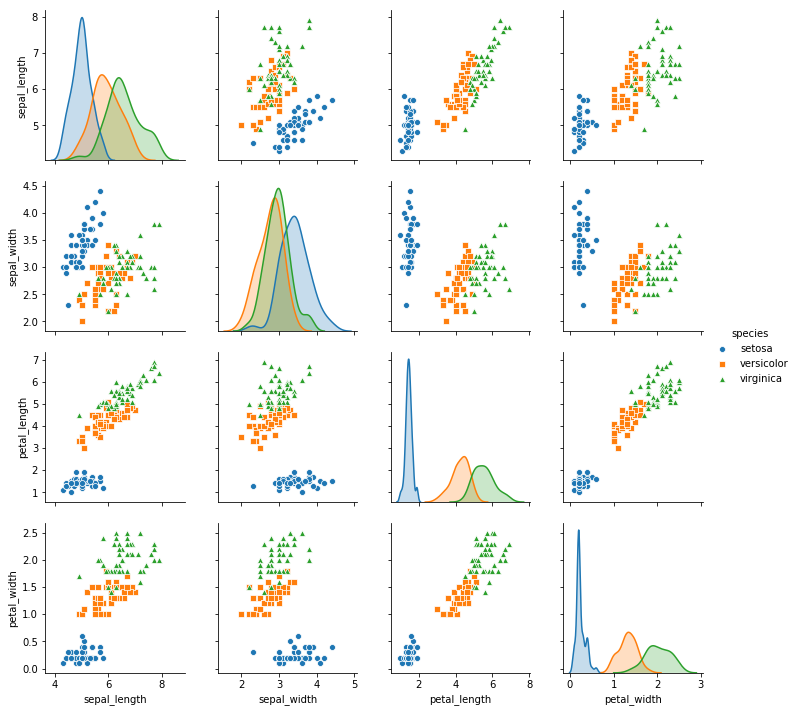

In [52]:
sns.pairplot(df,hue='species',markers=['o','s','^'])

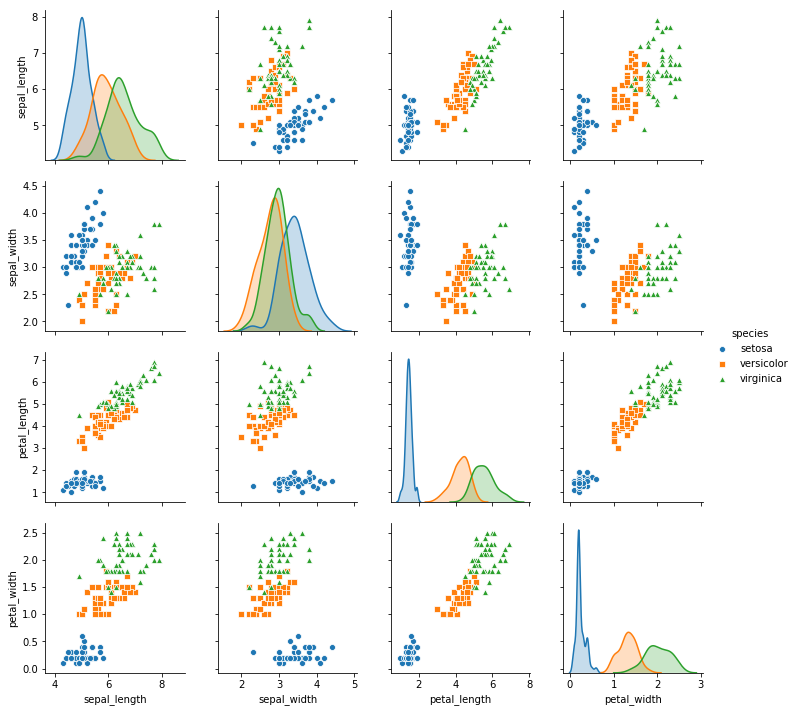

In [53]:
# 원하는 컬럼만 지정
sns.pairplot(df,hue='species',markers=['o','s','^'])

In [54]:
# df.corr() : 수치형 변수 간의 상관계수, NaN
# 상관계수 : 상관관계의 강한 정도 -1<=r<=1
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


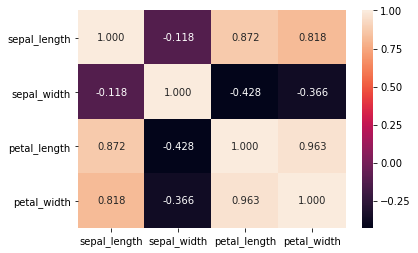

In [55]:
# heatmap : 상관계수에 대한 시각화
sns.heatmap(df.corr(),annot=True,fmt='.3f')